In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Leemos nuestro dataset que esta en un archivo xlsx que paso el cliente
dfVentasComple = pd.read_excel('../Ventas Mar-Ago.xlsx')

#hacemos drop de unas columnas que comentaron que no son necesarias agregar en lo mas minimo creando una array de las columnas a eliminar
dropColumns = ['SKU','Código de Barras','Lote','Caducidad del Lote','Estado','Entrega','Cajero','Vendedor','Caja','Sucursal','Canal']
dfVentasComple = dfVentasComple.drop(columns=dropColumns).reset_index()

#Ahora estandarizamos los datos de la fecha de las ventas del cliente pasandolo de un string a un formato de fecha
dfVentasComple['Fecha'] = pd.to_datetime(dfVentasComple['Fecha'])

#Aplicamos el redondeo a los valores de las columnas dejandolo solo en 2 decimales
dfVentasComple['Descuento'] = dfVentasComple['Descuento'].round(2)
dfVentasComple['Margen'] = dfVentasComple['Margen'].round(2)
dfVentasComple['Total'] = dfVentasComple['Total'].round(2)

#Cambiamos el nombre de una columna ya que no se entendia muy bien ya que es precio unitario es decir precio por cada pieza
dfVentasComple = dfVentasComple.rename(columns={'Precio Unitario': 'Precio de Venta'})

#Igualmente creamos 2 nuevas columnas dentro de nuestro set de datos el cual tendra el mes y año de la fecha de la venta que se realizo esto
#para un analisis todavia mas profundo de los datos.
dfVentasComple['Mes'] = dfVentasComple['Fecha'].dt.month
dfVentasComple['Año'] = dfVentasComple['Fecha'].dt.year

#En otro dataframe almacenamos los productos que sean de envio ya que esos no se tomaran para el analisis de las ventas si no como gastos
dfEnvios = dfVentasComple[dfVentasComple['Producto'] == 'Envio'].reset_index()

#Ahora ya que sacamos los envios en el mismo dataframe solo obtenemos las ventas que no sean envios para su analisis
dfVentasComple = dfVentasComple[dfVentasComple['Producto'] != 'Envio'].sort_values(by= 'Fecha', ascending = True).reset_index(drop=True)

#Obtenemos un valor que dentro de el set de datos que no estaba, este es el costo unitario por producto es decir lo que le cuesta cada
#producto unitariamente ya que el set de datos lo tiene todo junto
dfVentasComple['Costo Unitario'] = dfVentasComple['Costo'] / dfVentasComple['Cantidad']

#Reordenamos todo nuestro DF principal de las ventas para su mejor manipulacion y visualizacion
dfVentasComple = dfVentasComple[["index", "Número de Venta", "Fecha", "Mes", "Año", "Producto", "Categoria", "Marca",
         "Costo Unitario", "Cantidad", "Costo", "Subtotal", "Descuento",
         "Total", "Margen", "Cliente"]]

#Obtenemos un nuevo dataframe a peticion del cliente quitando las categorias suplementos (ya que estos son genericos y no les interesa saber su analisis)
#son propios de maquila solo interes suplementacion Americana (de importacion)
#este nuevo dataframe agrupado por año, mes para obtener los totales de cantidades, margen y total de ventas que existieron de ese mes de ese año
dfVentasMensuales = dfVentasComple[dfVentasComple['Categoria'] != 'Suplementos']
dfVentasMensuales = (dfVentasMensuales.groupby(['Año','Mes'])[['Cantidad','Total','Margen']].sum().sort_values(by = 'Margen', ascending = False).reset_index())

#Redondeamos a solo 2 decimales los valores del Margen y del total
dfVentasMensuales['Margen'] = dfVentasMensuales['Margen'].round(2)
dfVentasMensuales['Total'] = dfVentasMensuales['Total'].round(2)
dfVentasMensuales

C:\Users\CESAR\AppData\Local\Temp\ipykernel_29856\1247072709.py:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfVentasComple['Fecha'] = pd.to_datetime(dfVentasComple['Fecha'])


,Año,Mes,Cantidad,Total,Margen
0,2025,8,219,104250.28,38320.28
1,2025,5,248,90441.53,26502.53
2,2025,4,191,59620.00,20575.00
3,2025,3,175,55146.30,16618.30
4,2025,7,125,44285.17,16420.17
5,2025,6,129,51320.00,15370.00


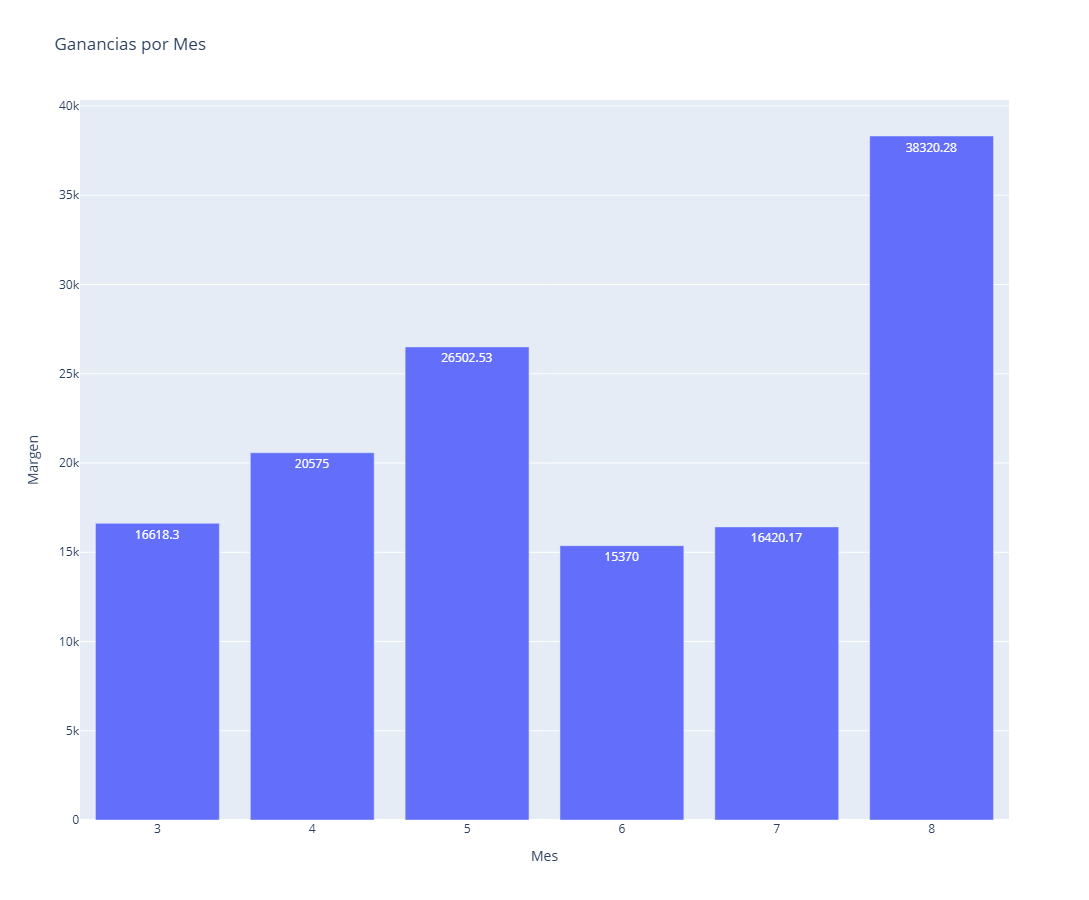

In [2]:
fig = px.bar(dfVentasMensuales, x='Mes', y='Margen', title="Ganancias por Mes", text='Margen',height=900)
fig.show()

In [4]:
#Identificando que el mes con MAYOR margen es el Agosto y el que dejo MENOR margen es Junio obtenemos todos los registros de estos 2 en un nuevo DF
#Obtenemos un nuevo dataframe a peticion del cliente quitando las categorias suplementos (ya que estos son genericos y no les interesa saber su analisis)
dfTopLessCategoriaSales = dfVentasComple[dfVentasComple['Categoria'] != 'Suplementos']
dfTopLessCategoriaSales = dfTopLessCategoriaSales[dfTopLessCategoriaSales['Mes'].isin([6,8])]
dfTopLessCategoriaSales = (dfTopLessCategoriaSales.groupby(['Año','Mes','Categoria'])[['Cantidad','Total','Margen']].sum().reset_index()
    .sort_values(by=['Mes','Margen'], ascending=[True, False]))
dfTopLessCategoriaSales

,Año,Mes,Categoria,Cantidad,Total,Margen
1,2025,6,Ashwagandha,25,8420.00,4455.00
4,2025,6,Cafeina Anhidra,20,7325.00,1510.00
10,2025,6,HMB,13,5150.00,1100.00
2,2025,6,BCAA,10,5435.00,1000.00
11,2025,6,L-Arginina,9,3065.00,920.00
12,2025,6,Mutivitaminicos,6,2640.00,915.00
7,2025,6,Electrolitos,6,2200.00,875.00
17,2025,6,Proteina Vegana,4,2815.00,725.00
3,2025,6,CLA,6,2725.00,635.00
5,2025,6,Caseina,4,1735.00,500.00
